We know that a difference exists in the number per 1000 visits which are due to opiods between rural and urban counties in New York. Does the number of health facilities in the county relate to the number of visits due to opiods in that county?

In [263]:
import pandas as pd 
import numpy as np

df = pd.read_csv('data.csv')

cols = ['Year', 'Patient County Name', 'Rural/Urban', 'Inpatient Total Opioid', 'Inpatient Total Rate Per 1000 ', 
        'Other Outpatient Total Opioid', 'Other Outpatient Total Rate Per 1000', 'Overall Opioid', 'Overall Rate Per 1000']

df = df.loc[:, cols]

df = df.pivot_table(df, index=['Rural/Urban', 'Year', 'Patient County Name'], aggfunc='sum')

In [264]:
df2 = pd.read_csv('datasettwo.csv')

cols2 = ['Facility ID', 'Description', 'Facility Open Date', 'Facility County']
df2 = df2.loc[:, cols2]

df2['Facility Open Date'] = pd.to_datetime(df2['Facility Open Date'], yearfirst=True)
df2 = df2[df2['Facility Open Date'] < '2016']

cols3 = ['Facility ID', 'Description', 'Facility County']
df2 = df2.loc[:, cols3]

df2 = df2.pivot_table(df2, index=['Facility County', 'Description',], aggfunc='count')
df2.rename(columns={'Facility ID':'Facility Count'}, inplace=True)

Now that we've cleaned the two datasets we can combine the health center information with the visit number information. Hypothetically we should see a negative correlation between the number of health facilities and the number of opioid related health visits.

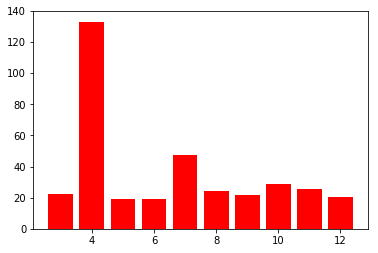

(-0.24398015513060706, 0.06494321396127745)


In [265]:
import matplotlib.pyplot as plt
import scipy.stats as stats

df5 = df.reset_index()
df5 = df5.pivot_table(df5, index=['Rural/Urban', 'Patient County Name'], aggfunc='sum')
df5 = df5.drop(columns='Year')
df5 = df5.reset_index()
df5 = df5.set_index('Patient County Name')

df4 = df2.reset_index()
df4 = df4.pivot_table(df4, index='Facility County', aggfunc='count')
df4 = df4.drop(columns='Description')

df5 = df5.join(df4)
df5 = df5.dropna(axis=0, how='any')

plt.bar(df5['Facility Count'], df5['Overall Rate Per 1000'], color='red')
plt.show()

print(stats.pearsonr(df5['Facility Count'], df5['Overall Rate Per 1000']))

We see that there is only a negligible correlation between the number of health facilities and the overall rate of visits related to opiods. There for our hypothesis does not hold up. We still want to examine the numbers for rural versus urban counties though. 

In [266]:
drural = df5[df5['Rural/Urban'] == 'Rural']
durban = df5[df5['Rural/Urban'] == 'Urban']

print(stats.ttest_ind(drural['Facility Count'], durban['Facility Count']))
print(stats.ttest_ind(drural['Overall Rate Per 1000'], durban['Overall Rate Per 1000']))

print(stats.pearsonr(drural['Facility Count'], drural['Overall Rate Per 1000']))
print(stats.pearsonr(durban['Facility Count'], durban['Overall Rate Per 1000']))

Ttest_indResult(statistic=-2.20935249480226, pvalue=0.03125683505392438)
Ttest_indResult(statistic=0.6293496660875182, pvalue=0.5316793717213909)
(-0.37224452892614607, 0.08026396197344915)
(-0.1260459475483209, 0.4706010492440983)


Last time we did not check to see whether or not the difference in the number of opioid visits per thousand between urban and rural counties was significant. When we do so now we see that there is moderate amounts of difference between the rates. The p-value is 0.5 however which is much higher than we want for reliable testing. We also do a t-test for health facilities in rural versus urban counties. This time we do get a significant difference, with there being a difference of -2 between the number of rural and urban health facilities. The p-value here is 0.03 which makes this result significant. 

There is no clear difference in visit rate between rural and urban counties but there is a statistically significant difference in the number of health facilities between rural and urban counties. The correlation between the number of facilities and the number of visits isn’t significant for either rural or urban counties. There is a higher correlation between the number of facilities and the number of visits for rural counties than there is for urban counties. 

The hypothesis that the number of visits related to opiods is negatively correlated to the number of health facilities in a county is therefore not correct. The fact that the kind of health facility it was was not controlled for may be the reason we could not find a correlation. There were descriptions for the kind of facilities that are but not for the kind of services offered. There was no way to filter out the ones that offer resources for substance abuse reliably. I should look through the open data website for New York state and see if there are datasets with the number of facilities offering substance abuse resources and rerun the analysis.
